In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.io_utils import HDF5Matrix
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Open the file as readonly
h5f = h5py.File(r'C:\Users\RKRIS\Downloads\Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1).astype('float32')

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32, 1) (42000,)
Validation set (60000, 32, 32, 1) (60000,)
Test set (18000, 32, 32, 1) (18000,)


Lets see images from diffferent sets

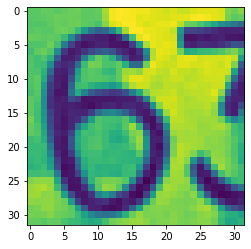

6


In [3]:
plt.imshow(np.squeeze(X_train[1])) 
plt.show()
print(y_train[1])

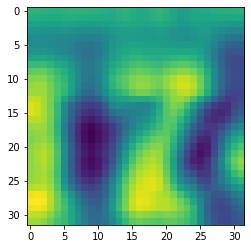

7


In [4]:
plt.imshow(np.squeeze(X_test[1]))
plt.show()
print(y_test[1])

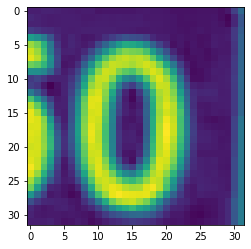

0


In [5]:
plt.imshow(np.squeeze(X_val[1])) 
plt.show()
print(y_val[1])

In [6]:
#Resize the image to a fixed size, then flatten the image into a list of raw pixel intensities
    
import cv2
def image_to_vector(image, size=(32, 32)):
    return cv2.resize(image, size).flatten()

In [7]:
train_raw = []

for (i, imagePath) in enumerate(X_train):
    pixels = image_to_vector(X_train[i])
    train_raw.append(pixels)
train_raw = np.array(train_raw)
train_raw.shape

(42000, 1024)

In [8]:
import keras
from keras.utils import np_utils
trainY = keras.utils.to_categorical(y_train, 10)
testY = keras.utils.to_categorical(y_test, 10)
valY = keras.utils.to_categorical(y_val, 10)

In [9]:
print(trainY.shape)

(42000, 10)


# CNN Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import optimizers

BATCH_SIZE = 32
EPOCH = 25
# neural network model
model = Sequential()
model.add(Convolution2D(128, (5,5), input_shape = (32, 32, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(32, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',
              metrics = ['accuracy'])

# Train the Model

In [11]:
Earlystopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
ModelCheckpoint = ModelCheckpoint("cnn1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.fit(X_train, trainY, nb_epoch=EPOCH, batch_size=BATCH_SIZE,
          validation_data=(X_test, testY), verbose=True, callbacks = [Earlystopping, ModelCheckpoint])

C:\Users\RKRIS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 349s 8ms/step - loss: 1.8104 - accuracy: 0.3632 - val_loss: 1.1492 - val_accuracy: 0.6308
Epoch 2/25


C:\Users\RKRIS\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
C:\Users\RKRIS\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


42000/42000 [==============================] - 334s 8ms/step - loss: 0.9452 - accuracy: 0.7140 - val_loss: 0.5995 - val_accuracy: 0.8242
Epoch 3/25
42000/42000 [==============================] - 335s 8ms/step - loss: 0.7139 - accuracy: 0.7928 - val_loss: 0.5169 - val_accuracy: 0.8441
Epoch 4/25
42000/42000 [==============================] - 329s 8ms/step - loss: 0.6129 - accuracy: 0.8295 - val_loss: 0.4405 - val_accuracy: 0.8699
Epoch 5/25
42000/42000 [==============================] - 330s 8ms/step - loss: 0.5653 - accuracy: 0.8431 - val_loss: 0.4222 - val_accuracy: 0.8781
Epoch 6/25
42000/42000 [==============================] - 332s 8ms/step - loss: 0.5180 - accuracy: 0.8573 - val_loss: 0.3917 - val_accuracy: 0.8877
Epoch 7/25
42000/42000 [==============================] - 332s 8ms/step - loss: 0.4814 - accuracy: 0.8661 - val_loss: 0.3742 - val_accuracy: 0.8944
Epoch 8/25
42000/42000 [==============================] - 329s 8ms/step - loss: 0.4719 - accuracy: 0.8702 - val_loss: 0.346

Accuracy could have been increased more if we increase the Epochs, but the architechture used is time takeing therefore only using 25 epochs

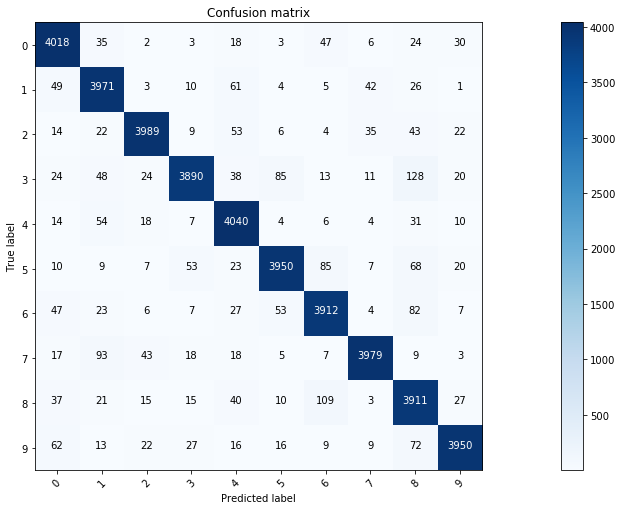

In [31]:
#Confusion Matrix Trainn Data
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_train)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(trainY,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Above is the Confusion Matrix with Train Data 

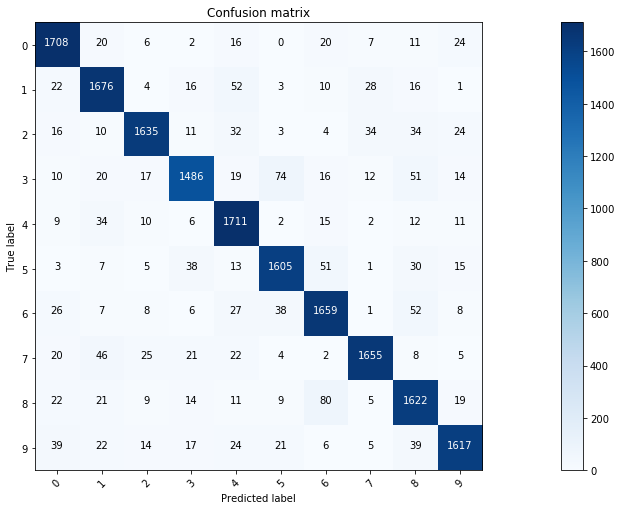

In [32]:
#Confusion Matrix Test Data 
plt.subplots(figsize=(22,7)) #set the size of the plot 
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testY,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Above is the Confusion Matrix with Test Data

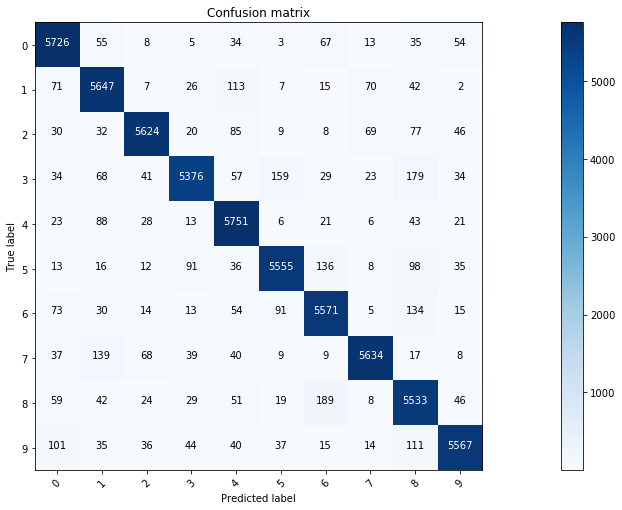

In [35]:
#Confusion Matrix Validation Data 
plt.subplots(figsize=(22,7)) #set the size of the plot 
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(valY,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Above is the Confusion Matrix with Validation Data 